# 任务1：此处函数不收敛，调试寻找原因
1. 检查数据，如果数据不包含特征，神经网络无法收敛。 
2: 调整学习率，检查收敛速率。
3: 找到合适的收敛参数。


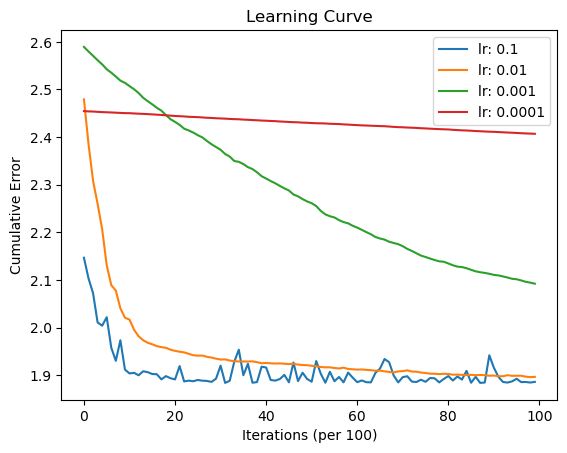

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, learning_rate):
        # 初始化权重和偏置
        self.weights = np.random.randn(2)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        
    def _sigmoid(self, x):
        # 激活函数——sigmoid 
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        # 激活函数的导数
        sigmoid = self._sigmoid(x)
        return sigmoid * (1 - sigmoid)

    def predict(self, input_vector):
        # 计算隐藏层
        layer_1 = input_vector @ self.weights + self.bias
        # 计算输出层
        layer_2 = self._sigmoid(layer_1)
        return layer_2

    def _compute_gradients(self, input_vector, target):
        # 前向传播，根据链式法则计算梯度
        layer_1 = input_vector @ self.weights + self.bias
        layer_2 = self._sigmoid(layer_1)

        prediction = layer_2

        # 计算误差对预测值的导数
        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = input_vector

        derror_dbias = derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        derror_dweights = derror_dprediction * dprediction_dlayer1 * dlayer1_dweights

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        # 更新偏置
        self.bias -= derror_dbias * self.learning_rate
        # 更新权重
        self.weights -= derror_dweights * self.learning_rate

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # 随机选择一个数据点进行训练
            random_data_index = np.random.randint(len(input_vectors))
            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # 计算梯度
            derror_dbias, derror_dweights = self._compute_gradients(input_vector, target)
            # 更新参数
            self._update_parameters(derror_dbias, derror_dweights)

            # 每100次迭代打印一次误差
            if current_iteration % 100 == 0:
                cumulative_error = 0
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]
                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)
                    cumulative_error += error
                cumulative_errors.append(cumulative_error)
                #print(f"迭代次数 {current_iteration}, 误差: {cumulative_error}")
        
        return cumulative_errors

def normalize_data(data):
    # 数据归一化
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

# 使用示例
input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
    ]
)
targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

# 归一化数据
input_vectors = normalize_data(input_vectors)

learning_rates = [0.1, 0.01, 0.001, 0.0001]  # 学习率的不同取值
iterations = 10000

for lr in learning_rates:
    nn = NeuralNetwork(lr)
    training_error = nn.train(input_vectors, targets, iterations)
    
    # 绘制学习曲线
    plt.plot(training_error, label=f'lr: {lr}')

plt.xlabel('Iterations (per 100)')
plt.ylabel('Cumulative Error')
plt.title('Learning Curve')
plt.legend()
plt.savefig("cumulative_error.png")
plt.show()


结论：不同学习率下误差都在逐渐减小，尤其是学习率 0.01 和 0.1，说明数据中确实包含了特征，网络能够学习到这些特征。

学习率 0.01（橙色曲线） 是最佳选择，既能快速收敛又能保持误差稳定。

# 任务2： 添加一层神经网络，并评估训练效果，须做神经网络设计和理论推导。


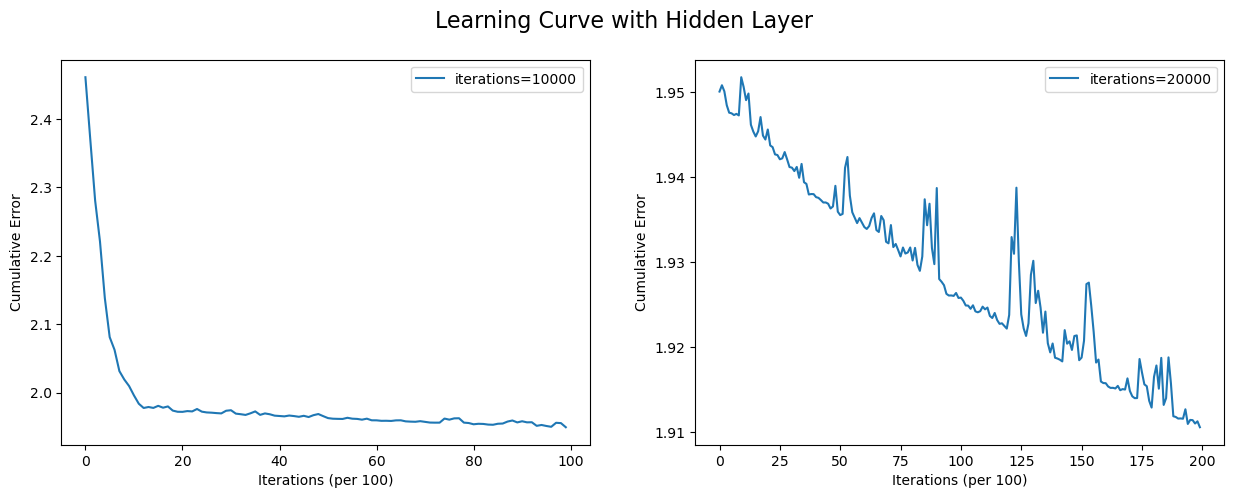

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, learning_rate):
        # 初始化输入层到隐藏层的权重和偏置
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.random.randn(hidden_size)
        # 初始化隐藏层到输出层的权重和偏置
        self.weights_hidden_output = np.random.randn(hidden_size, 1)
        self.bias_output = np.random.randn()
        self.learning_rate = learning_rate
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        sigmoid = self._sigmoid(x)
        return sigmoid * (1 - sigmoid)

    def predict(self, input_vector):
        # 计算隐藏层输出
        hidden_layer_input = np.dot(input_vector, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self._sigmoid(hidden_layer_input)
        # 计算输出层输出
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        prediction = self._sigmoid(output_layer_input)
        return prediction

    def _compute_gradients(self, input_vector, target):
        # 前向传播
        hidden_layer_input = np.dot(input_vector, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self._sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        prediction = self._sigmoid(output_layer_input)

        # 计算输出层误差的梯度
        derror_dprediction = 2 * (prediction - target)
        dprediction_doutput_layer_input = self._sigmoid_deriv(output_layer_input)
        doutput_layer_input_dweights_hidden_output = hidden_layer_output
        doutput_layer_input_dbias_output = 1
        doutput_layer_input_dhidden_layer_output = self.weights_hidden_output.T

        derror_dbias_output = derror_dprediction * dprediction_doutput_layer_input * doutput_layer_input_dbias_output
        derror_dweights_hidden_output = np.dot(hidden_layer_output.reshape(-1, 1), (derror_dprediction * dprediction_doutput_layer_input).reshape(1, -1))

        # 计算隐藏层误差的梯度
        derror_dhidden_layer_output = np.dot(derror_dprediction * dprediction_doutput_layer_input, doutput_layer_input_dhidden_layer_output)
        dhidden_layer_output_dhidden_layer_input = self._sigmoid_deriv(hidden_layer_input)
        dhidden_layer_input_dweights_input_hidden = input_vector.reshape(-1, 1)
        dhidden_layer_input_dbias_hidden = 1

        derror_dbias_hidden = derror_dhidden_layer_output * dhidden_layer_output_dhidden_layer_input * dhidden_layer_input_dbias_hidden
        derror_dweights_input_hidden = np.dot(dhidden_layer_input_dweights_input_hidden, (derror_dhidden_layer_output * dhidden_layer_output_dhidden_layer_input).reshape(1, -1))

        return derror_dbias_output, derror_dweights_hidden_output, derror_dbias_hidden, derror_dweights_input_hidden

    def _update_parameters(self, derror_dbias_output, derror_dweights_hidden_output, derror_dbias_hidden, derror_dweights_input_hidden):
        # 更新输出层参数
        self.bias_output -= self.learning_rate * derror_dbias_output
        self.weights_hidden_output -= self.learning_rate * derror_dweights_hidden_output
        # 更新隐藏层参数
        self.bias_hidden -= self.learning_rate * derror_dbias_hidden
        self.weights_input_hidden -= self.learning_rate * derror_dweights_input_hidden

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            random_data_index = np.random.randint(len(input_vectors))
            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]
            
            derror_dbias_output, derror_dweights_hidden_output, derror_dbias_hidden, derror_dweights_input_hidden = self._compute_gradients(input_vector, target)
            self._update_parameters(derror_dbias_output, derror_dweights_hidden_output, derror_dbias_hidden, derror_dweights_input_hidden)

            if current_iteration % 100 == 0:
                cumulative_error = 0
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]
                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)
                    cumulative_error += error
                cumulative_errors.append(cumulative_error)
                #print(f"迭代次数 {current_iteration}, 累计误差: {cumulative_error}")
        
        return cumulative_errors

def normalize_data(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

# 使用示例
input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
    ]
)
targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])
input_vectors = normalize_data(input_vectors)

learning_rate = 0.01  # 使用之前实验的最佳学习率
nn = NeuralNetwork(input_size=2, hidden_size=2, learning_rate=learning_rate)
training_error = nn.train(input_vectors, targets, iterations=10000)
training_error_1 = nn.train(input_vectors, targets, iterations=20000)

# 绘制学习曲线
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(training_error,label='iterations=10000') 
axs[0].set_xlabel('Iterations (per 100)')
axs[0].set_ylabel('Cumulative Error')
axs[0].legend()

axs[1].plot(training_error_1,label='iterations=20000') 
axs[1].set_xlabel('Iterations (per 100)')
axs[1].set_ylabel('Cumulative Error')
axs[1].legend()

fig.suptitle('Learning Curve with Hidden Layer', fontsize=16)
plt.savefig('Learning Curve with Hidden Layer.png')
plt.show()



# 任务3： 将偏置融入权重，重新设计设计网络代码。

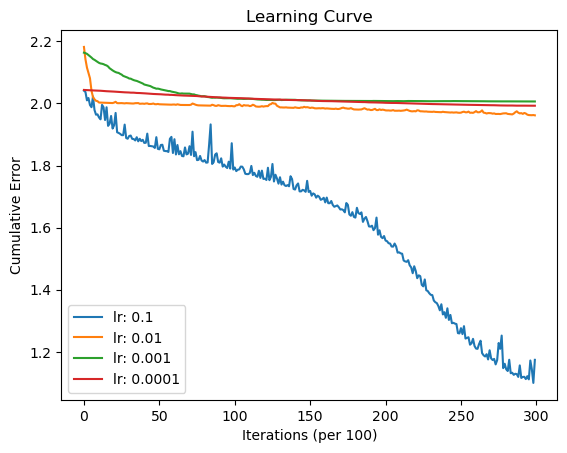

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, learning_rate):
        # 初始化输入到隐藏层的权重（包括偏置）
        self.weights_input_hidden = np.random.randn(input_size + 1, hidden_size)
        # 初始化隐藏层到输出层的权重（包括偏置）
        self.weights_hidden_output = np.random.randn(hidden_size + 1, 1)
        self.learning_rate = learning_rate
        #这里的 +1 是为了将偏置项融入权重中。在每个权重矩阵中，额外的一行用于存储偏置参数。
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        sigmoid = self._sigmoid(x)
        return sigmoid * (1 - sigmoid)

    def predict(self, input_vector):
        # 添加偏置项到输入向量
        input_vector_with_bias = np.append(input_vector, 1)
        # 计算隐藏层输出
        hidden_layer_input = np.dot(input_vector_with_bias, self.weights_input_hidden)
        hidden_layer_output = self._sigmoid(hidden_layer_input)
        # 添加偏置项到隐藏层输出
        hidden_layer_output_with_bias = np.append(hidden_layer_output, 1)
        # 计算输出层输出
        output_layer_input = np.dot(hidden_layer_output_with_bias, self.weights_hidden_output)
        prediction = self._sigmoid(output_layer_input)
        return prediction

    def _compute_gradients(self, input_vector, target):
        # 添加偏置项到输入向量
        input_vector_with_bias = np.append(input_vector, 1)
        # 前向传播
        hidden_layer_input = np.dot(input_vector_with_bias, self.weights_input_hidden)
        hidden_layer_output = self._sigmoid(hidden_layer_input)
        # 添加偏置项到隐藏层输出
        hidden_layer_output_with_bias = np.append(hidden_layer_output, 1)
        output_layer_input = np.dot(hidden_layer_output_with_bias, self.weights_hidden_output)
        prediction = self._sigmoid(output_layer_input)

        # 计算输出层梯度
        derror_dprediction = 2 * (prediction - target)
        dprediction_doutput_layer_input = self._sigmoid_deriv(output_layer_input)
        doutput_layer_input_dweights_hidden_output = hidden_layer_output_with_bias
        derror_dweights_hidden_output = doutput_layer_input_dweights_hidden_output.reshape(-1, 1) * (derror_dprediction * dprediction_doutput_layer_input)

        # 计算隐藏层梯度
        derror_dhidden_layer_output = np.dot(self.weights_hidden_output[:-1], derror_dprediction * dprediction_doutput_layer_input)
        dhidden_layer_output_dhidden_layer_input = self._sigmoid_deriv(hidden_layer_input)
        dhidden_layer_input_dweights_input_hidden = input_vector_with_bias.reshape(-1, 1)
        derror_dweights_input_hidden = dhidden_layer_input_dweights_input_hidden.dot((derror_dhidden_layer_output * dhidden_layer_output_dhidden_layer_input).reshape(1, -1))

        return derror_dweights_hidden_output, derror_dweights_input_hidden

    def _update_parameters(self, derror_dweights_hidden_output, derror_dweights_input_hidden):
        # 更新隐藏层到输出层的权重
        self.weights_hidden_output -= self.learning_rate * derror_dweights_hidden_output
        # 更新输入到隐藏层的权重
        self.weights_input_hidden -= self.learning_rate * derror_dweights_input_hidden

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            random_data_index = np.random.randint(len(input_vectors))
            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]
            
            derror_dweights_hidden_output, derror_dweights_input_hidden = self._compute_gradients(input_vector, target)
            self._update_parameters(derror_dweights_hidden_output, derror_dweights_input_hidden)

            if current_iteration % 100 == 0:
                cumulative_error = 0
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]
                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)
                    cumulative_error += error
                cumulative_errors.append(cumulative_error)
        
        return cumulative_errors

# 数据归一化函数
def normalize_data(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

# 示例用法
input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
    ]
)
targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])
input_vectors = normalize_data(input_vectors)

learning_rates = [0.1, 0.01, 0.001, 0.0001]  # 学习率的不同取值
input_size = input_vectors.shape[1]
hidden_size = 2
iterations = 30000

for lr in learning_rates:
    nn = NeuralNetwork(input_size=input_size, hidden_size=hidden_size, learning_rate=lr)
    training_error = nn.train(input_vectors, targets, iterations)
    
    # 绘制学习曲线
    plt.plot(training_error, label=f'lr: {lr}')

plt.xlabel('Iterations (per 100)')
plt.ylabel('Cumulative Error')
plt.title('Learning Curve')
plt.legend()
plt.savefig("new_network_error.png")
plt.show()